In [31]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.tri as tri

import librosa
import librosa.display
import IPython.display

from sklearn.decomposition import FastICA

In [2]:
fs, data = wavfile.read('Maquiladora.wav')
duration = data.shape[0]/fs #duration in seconds

FileNotFoundError: [Errno 2] No such file or directory: 'Maquiladora.wav'

In [ ]:
data.shape

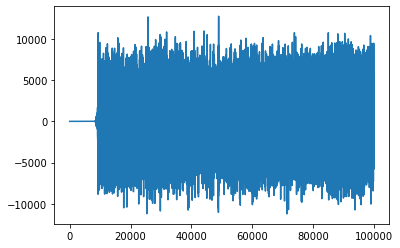

In [46]:
plt.plot(data[:,0][:100000])

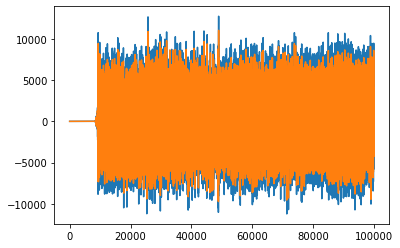

In [5]:
plt.plot(data[:,:][:100000])

In [8]:
X = data[:,0][:100000]

In [11]:
X = np.fft.fft(X)

In [12]:
X.shape

(100000,)

/opt/conda/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


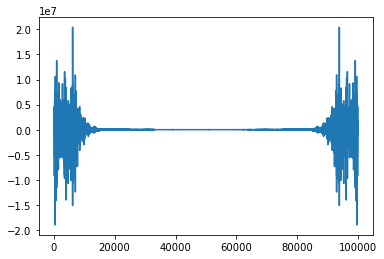

In [13]:
plt.plot(X)

In [36]:
transformer = FastICA(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 2
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


In [37]:
X_transformed.shape

(100000, 2)

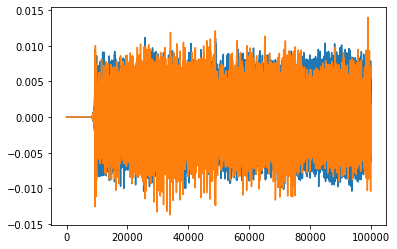

In [38]:
plt.plot(X_transformed)

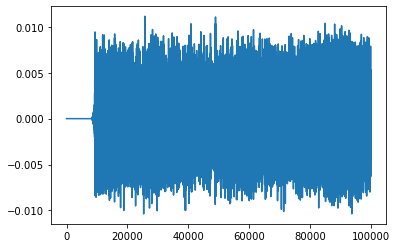

In [43]:
plt.plot(X_transformed[:,0])

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
X, _ = load_digits(return_X_y=True)
transformer = FastICA(n_components=7,random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(1797, 7)

In [4]:
X.shape

(1797, 64)

In [5]:
# this class defines object that extracts frequency and amplitude features versus time for sound signals
class music_feature_extractor(object):
    import numpy as np
    from matplotlib import pyplot as plt
    %matplotlib inline

    import librosa
    import librosa.display
    import IPython.display
    
    
    def __init__(self, audio_path):
        self.audio_path = audio_path
        self.y,self.sr=librosa.load(self.audio_path)
        self.T=len(self.y)/self.sr  #length of song in seconds
        self.y_harmonic=None
        
    def get_song_len(self,prnt=True):
        print(self.T//60,'Minute, ',int(self.T%60),'seconds')
        return self.T
    
    #display a mel-scaled power (energy-squared) spectrogra
    def get_mel_spectrogram(self,n_mels=128,plot=False):
        self.mel_spectrom = librosa.feature.melspectrogram(self.y, sr=self.sr, n_mels=n_mels)
        self.log_S = librosa.power_to_db(self.mel_spectrom, ref=np.max)
        if plot:
            plt.figure(figsize=(12,4))
            librosa.display.specshow(self.log_S, sr=self.sr, x_axis='time', y_axis='mel')
            self.fps=int(bs.log_S.shape[-1]/bs.T)
        return self.log_S
    
    def get_hp_seperation(self,plot=False):
        self.y_harmonic, self.y_percussive = librosa.effects.hpss(self.y)
        self.S_harmonic   = librosa.feature.melspectrogram(self.y_harmonic, sr=self.sr)
        self.S_percussive = librosa.feature.melspectrogram(self.y_percussive, sr=self.sr)
        self.log_Sh = librosa.power_to_db(self.S_harmonic, ref=np.max)
        self.log_Sp = librosa.power_to_db(self.S_percussive, ref=np.max)
        if plot:
            plt.figure(figsize=(12,6))
            plt.subplot(2,1,1)
            librosa.display.specshow(self.log_Sh, sr=self.sr, y_axis='mel')
            plt.title('mel power spectrogram (Harmonic)')
            plt.colorbar(format='%+02.0f dB')
            plt.subplot(2,1,2)
            librosa.display.specshow(self.log_Sp, sr=self.sr, x_axis='time', y_axis='mel')
            plt.title('mel power spectrogram (Percussive)')
            plt.colorbar(format='%+02.0f dB')
            plt.tight_layout()
        return self.log_Sh,self.log_Sp
    
    # this function performed constant-Q transform
    # for musical data the exponential frequency resolution of constant-Q transform is ideal
    def get_chromagram(self, bins_per_octave=36):
        if self.y_harmonic is None:
            self.y_harmonic, self.y_percussive = librosa.effects.hpss(self.y)
        C = librosa.feature.chroma_cqt(y=self.y_harmonic, sr=self.sr, bins_per_octave=bins_per_octave)
        
        return C
            
    def plot_pitch_chromagram(self):
        C = get_chromagram(bins_per_octave=36)
        
        plt.figure(figsize=(12,4))
        librosa.display.sepecshow(C, sr=self.sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
        plt.title('Chromagram')
        plt.colorbar()
        plt.tight_layout()

In [32]:
#music_dir = 'Maquiladora.mp3'
music_dir = 'House_of_the_Rising_Sun.mp3'
ex = music_feature_extractor(music_dir)
C = ex.get_chromagram()

/home/zew038/librosa/librosa/core/audio.py:160: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


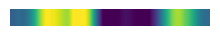

In [100]:

fig = plt.figure(figsize=(2.56, 2.56), dpi=100)
fig.set_size_inches(w, h)
ax = plt.Axes(fig,[0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(hh,interpolation='sinc')

fig.savefig('test.png',dpi=1000)

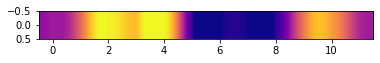

In [161]:
plt.imshow(hh,interpolation='sinc',cmap='plasma')

In [33]:
def plot_and_save(c, index,filepath='./fig/%s.png'):

    # First create the x and y coordinates of the points.
    n_angles = 48
    n_radii = 12
    min_radius = 0.25
    radii = np.linspace(min_radius, 0.95, n_radii)

    angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
    angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
    angles[:, 1::2] += np.pi / n_angles

    # c is a column of chromagram
    x = (c * np.cos(angles)).flatten()
    y = (c * np.sin(angles)).flatten()
    z = (np.cos(radii) * np.cos(3 * angles)).flatten()

    # Create the Triangulation; no triangles so Delaunay triangulation created.
    triang = tri.Triangulation(x, y)

    # Mask off unwanted triangles.
    triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                             y[triang.triangles].mean(axis=1))
                    < min_radius)


    fig1, ax1 = plt.subplots()
    ax1.set_aspect('equal')
    ax1.set_axis_off()
    tcf = ax1.tricontourf(triang, z, cmap='plasma')
    #fig1.colorbar(tcf)
    #ax1.tricontour(triang, z, colors='gray')
    #ax1.set_title('Contour plot of Delaunay triangulation')
    fig1.savefig('./fig3/%s.png'%index,dpi=100)
    plt.close(fig1)


In [35]:
i

5595

In [34]:
num_images = int(C.shape[1]/2)
for i in range(num_images):
    sum_2c = C[:,(2*i)] + C[:,(2*i+1)]

    plot_and_save(sum_2c/2,i)
    sum_2c = np.zeros(12)
    
    if i%100 ==0:
        print('%s graph saved.'%i)

0 graph saved.
100 graph saved.
200 graph saved.
300 graph saved.
400 graph saved.
500 graph saved.
600 graph saved.
700 graph saved.
800 graph saved.
900 graph saved.
1000 graph saved.
1100 graph saved.
1200 graph saved.
1300 graph saved.
1400 graph saved.
1500 graph saved.
1600 graph saved.
1700 graph saved.
1800 graph saved.
1900 graph saved.
2000 graph saved.
2100 graph saved.
2200 graph saved.
2300 graph saved.
2400 graph saved.
2500 graph saved.
2600 graph saved.
2700 graph saved.
2800 graph saved.
2900 graph saved.
3000 graph saved.
3100 graph saved.
3200 graph saved.
3300 graph saved.
3400 graph saved.
3500 graph saved.
3600 graph saved.
3700 graph saved.
3800 graph saved.
3900 graph saved.
4000 graph saved.
4100 graph saved.
4200 graph saved.
4300 graph saved.
4400 graph saved.
4500 graph saved.
4600 graph saved.
4700 graph saved.
4800 graph saved.
4900 graph saved.
5000 graph saved.
5100 graph saved.
5200 graph saved.
5300 graph saved.
5400 graph saved.
5500 graph saved.


Text(0.5, 1.0, 'tripcolor of Delaunay triangulation, flat shading')

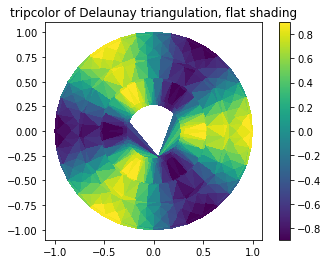

In [189]:
# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 12
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (c * np.cos(angles)).flatten()
y = (c * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, z, shading='flat')
fig1.colorbar(tpc)
ax1.set_title('tripcolor of Delaunay triangulation, flat shading')

Text(0.5, 1.0, 'tripcolor of Delaunay triangulation, flat shading')

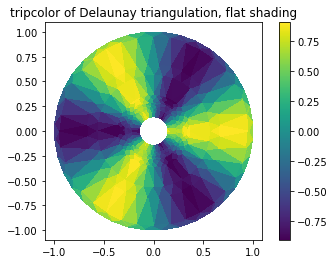

In [196]:
c = C[:,25]

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 12
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (c * np.cos(angles)).flatten()
y = (c * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, z, shading='flat')
fig1.colorbar(tpc)
ax1.set_title('tripcolor of Delaunay triangulation, flat shading')

In [138]:
# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

x = np.arange(12)/10
y = np.arange(12)/10

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)


fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(triang, hh)
fig1.colorbar(tcf)
ax1.tricontour(triang, hh, colors='k')
ax1.set_title('Contour plot of Delaunay triangulation')

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

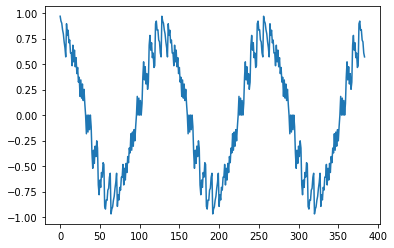

In [110]:
plt.plot(z)

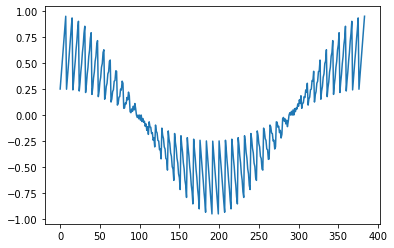

In [108]:
plt.plot(x)

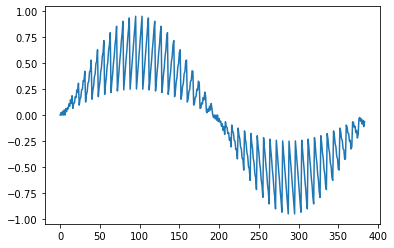

In [109]:
plt.plot(y)

Text(0.5, 1.0, 'Contour plot of Delaunay triangulation')

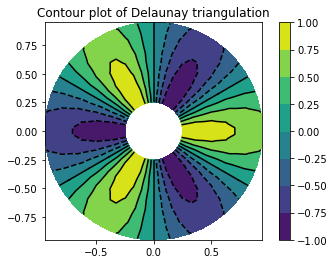

In [114]:
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(triang, z)
fig1.colorbar(tcf)
ax1.tricontour(triang, z, colors='k')
ax1.set_title('Contour plot of Delaunay triangulation')

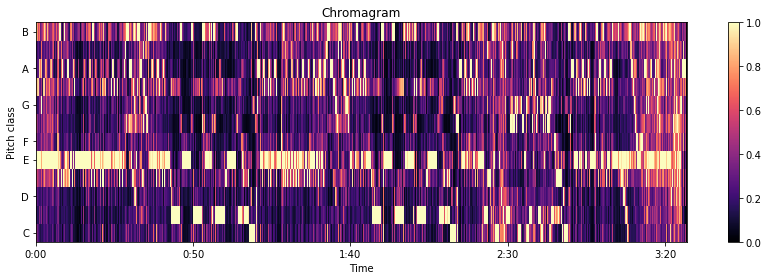

In [33]:
# We'll use a CQT-based chromagram with 36 bins-per-octave in the CQT analysis.  An STFT-based implementation also exists in chroma_stft()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr, bins_per_octave=36)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

In [39]:
print(C[:,0])

[0.20818175 0.26284166 0.16020912 0.26214643 0.15450625 0.10774524
 0.44455154 0.98064673 0.58110456 0.34058472 1.         0.83628132]


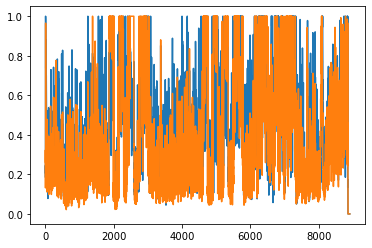

In [41]:
plt.plot(C[0,:])
plt.plot(C[1,:])

In [57]:
C.shape

(12, 8913)

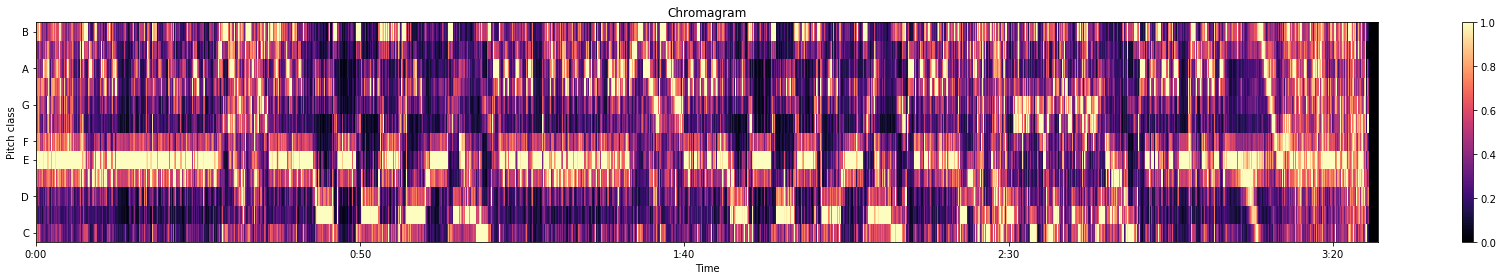

In [55]:
# We'll use a CQT-based chromagram with 36 bins-per-octave in the CQT analysis.  An STFT-based implementation also exists in chroma_stft()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr, bins_per_octave=12)

# Make a new figure
plt.figure(figsize=(24,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

In [23]:
y,sr = librosa.load('Maquiladora.mp3')

/home/zew038/librosa/librosa/core/audio.py:160: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [29]:
S.shape

(128, 8913)

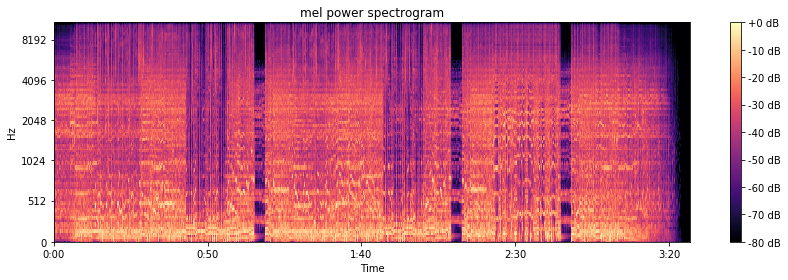

In [24]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

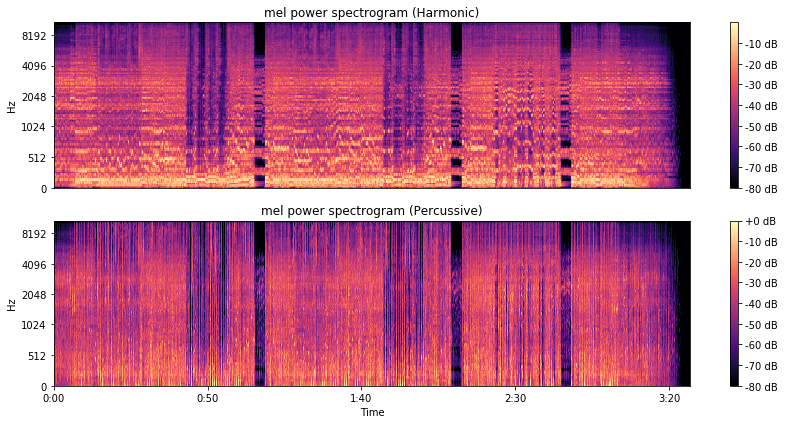

In [25]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()